In [2]:
from irrep.spacegroup import SpaceGroup
import numpy as np
from wannierberri.symmetry.point_symmetry import PointGroup


a = 4.134
c = 6.652

lattice = a * np.array([[1, 0, 0], [-1 / 2, np.sqrt(3) / 2, 0], [0, 0, c / a]])
positions = np.array(
    [
        [0, 0, 0],
        [0, 0, 1 / 2],
        [1 / 3, 2 / 3, 1 / 4],
        [2 / 3, 1 / 3, 3 / 4],
    ]
)
typat = [1, 1, 2, 2]
magmom = [[0, 1, 0], [0, -1, 0], [0, 0, 0], [0, 0, 0]]

mg = SpaceGroup.from_cell(real_lattice=lattice, positions=positions, typat=typat,
                          magmom=magmom)
mg.show()
pointgroup = PointGroup(spacegroup=mg)
print(pointgroup)
pointgroup.get_symmetric_components(rank=1, TRodd=True, Iodd=False)



 ---------- CRYSTAL STRUCTURE ---------- 


Cell vectors in angstroms:

      Vectors of DFT cell       
a0 =  4.1340   0.0000   0.0000  
a1 = -2.0670   3.5801   0.0000  
a2 =  0.0000   0.0000   6.6520  



 ---------- SPACE GROUP ----------- 


Space group: Cm'c'm (# 63.462)
Number of symmetries: 8 (mod. lattice translations)

 ### 1 

rotation : |  1   0   0 |
           |  0   1   0 |
           |  0   0   1 |


 gk = [kx, ky, kz]

spinor rot.         : | 1.000+0.000j  0.000+0.000j |
                      | 0.000+0.000j  1.000+0.000j |

translation         :  [   0.0000   0.0000   0.0000 ] 

axis: [0. 0. 1.] ; angle =  0 , inversion: False, time reversal: False

 ### 2 

rotation : | -1   0   0 |
           |  0  -1   0 |
           |  0   0  -1 |


 gk = [-kx, -ky, -kz]

spinor rot.         : | 1.000+0.000j  0.000+0.000j |
                      | 0.000+0.000j  1.000+0.000j |

translation         :  [   0.0000   0.0000   0.0000 ] 

axis: [0. 0. 1.] ; angle =  0 , inversion: True, 

['0=x=y', 'z']

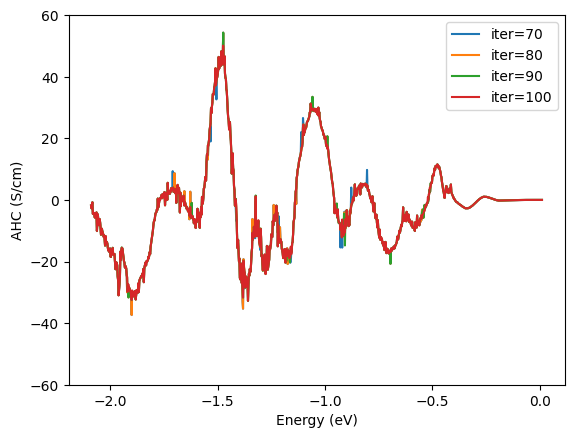

In [40]:
from matplotlib import pyplot as plt
EF=6.79
for i_iter in range(70, 101, 10):
    data = np.load(f"results/soc-ahc_int_iter-{i_iter:04d}.npz")
    y = data["data"][:,2]/100 # from S/m to S/cm
    x = data["Energies_0"]-EF
    plt.plot(x, y, label=f"iter={i_iter}")
plt.ylim(-60,60)
plt.xlabel("Energy (eV)")
plt.ylabel("AHC (S/cm)")
plt.legend()
plt.show()

In [5]:
%ls results


soc-cumdos_iter-0000.dat  soc-dos_iter-0000.dat
soc-cumdos_iter-0000.npz  soc-dos_iter-0000.npz
